In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import ccf
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

sns.set(rc={'figure.figsize':(12,6)})

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('AtchisonUV_20150801_to_20151119.csv', parse_dates = ['Date'])

In [3]:
df = df.sort_values(by='Date').reset_index(drop=True)

## General dataset characteristics

In [6]:
df.shape

(31642, 10)

In [5]:
df.head()

,Date,Benzene,CS2,Ozone,SO2,Toluene,Xylene,Wind Direction,Wind Speed,Wind Origin
0,2015-08-01 00:00:00,2.5,2.5,16.35,2.5,2.5,2.5,206.0,8.0,SSW
1,2015-08-01 00:05:00,2.5,2.5,19.00,2.5,2.5,2.5,206.0,8.0,SSW
2,2015-08-01 00:10:00,2.5,2.5,20.69,2.5,2.5,2.5,214.0,8.0,SSW
3,2015-08-01 00:15:00,2.5,2.5,20.13,2.5,2.5,2.5,219.0,9.0,SW
4,2015-08-01 00:20:00,2.5,2.5,20.22,2.5,2.5,2.5,219.0,11.0,SW


In [6]:
print(f"Min date: {df.Date.min()}")
print(f"Max date: {df.Date.max()}")

Min date: 2015-08-01 00:00:00
Max date: 2015-11-19 00:00:00


In [7]:
#5 min frequency data
missing_periods = pd.date_range(start = '2015-08-01', end = '2015-11-19', freq='5min').difference(df.Date)
missing_periods

DatetimeIndex(['2015-08-27 00:20:00', '2015-09-01 00:05:00',
               '2015-09-10 20:20:00', '2015-09-14 00:55:00',
               '2015-09-15 01:50:00', '2015-09-15 01:55:00',
               '2015-09-15 02:00:00', '2015-09-15 02:05:00',
               '2015-09-15 02:10:00', '2015-09-15 02:15:00',
               '2015-09-15 02:20:00', '2015-09-15 02:25:00',
               '2015-09-15 02:30:00', '2015-09-15 02:35:00',
               '2015-09-15 02:40:00', '2015-09-15 02:45:00',
               '2015-09-15 02:50:00', '2015-09-15 02:55:00',
               '2015-09-15 03:00:00', '2015-09-15 03:05:00',
               '2015-09-15 03:10:00', '2015-09-15 03:15:00',
               '2015-09-15 03:20:00', '2015-09-15 03:25:00',
               '2015-09-15 03:30:00', '2015-09-15 03:35:00',
               '2015-09-15 03:40:00', '2015-09-15 03:45:00',
               '2015-09-18 02:10:00', '2015-10-01 10:10:00',
               '2015-10-11 09:00:00', '2015-10-16 21:10:00',
               '2015-10-

In [8]:
print(f"Number of missing periods: {len(missing_periods)}")

Number of missing periods: 39


- 39 missing periods
- Mostly from 15th September 2015 (1.50am-3.45am)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31642 entries, 0 to 31641
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            31642 non-null  datetime64[ns]
 1   Benzene         31642 non-null  float64       
 2   CS2             31642 non-null  float64       
 3   Ozone           31642 non-null  float64       
 4   SO2             31642 non-null  float64       
 5   Toluene         31642 non-null  float64       
 6   Xylene          31642 non-null  float64       
 7   Wind Direction  31621 non-null  float64       
 8   Wind Speed      31621 non-null  float64       
 9   Wind Origin     31621 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.4+ MB


In [10]:
df.isnull().sum()

Date               0
Benzene            0
CS2                0
Ozone              0
SO2                0
Toluene            0
Xylene             0
Wind Direction    21
Wind Speed        21
Wind Origin       21
dtype: int64

In [11]:
df.describe()

,Benzene,CS2,Ozone,SO2,Toluene,Xylene,Wind Direction,Wind Speed
count,31642.000000,31642.0,31642.000000,31642.000000,31642.000000,31642.000000,31621.000000,31621.000000
mean,2.501436,2.5,27.279164,3.546245,2.820468,2.554937,172.248031,6.724582
std,0.078137,0.0,12.095794,6.921460,6.276938,2.181794,76.077180,3.245453
min,2.500000,2.5,2.500000,2.500000,2.500000,2.500000,0.000000,1.000000
25%,2.500000,2.5,18.750000,2.500000,2.500000,2.500000,140.000000,4.000000
50%,2.500000,2.5,26.040000,2.500000,2.500000,2.500000,163.000000,6.000000
75%,2.500000,2.5,34.320000,2.500000,2.500000,2.500000,207.000000,9.000000
max,9.950000,2.5,396.670000,313.310000,573.360000,220.610000,359.000000,26.000000


## Pollutants analysis

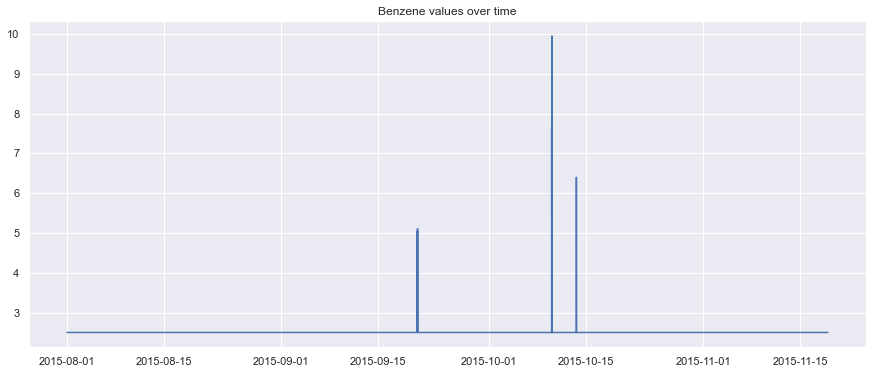

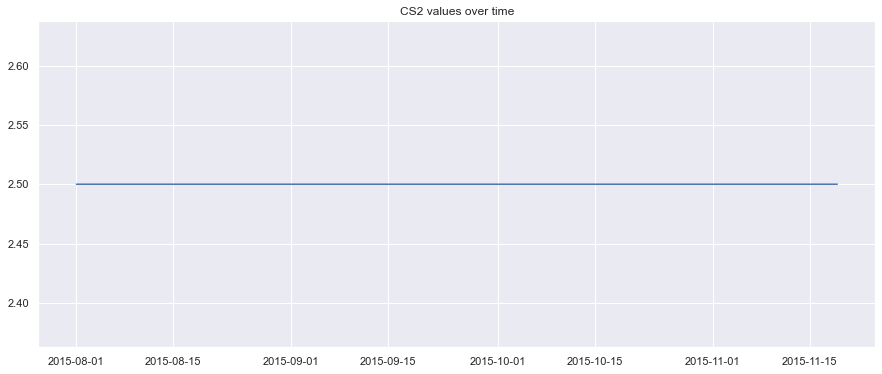

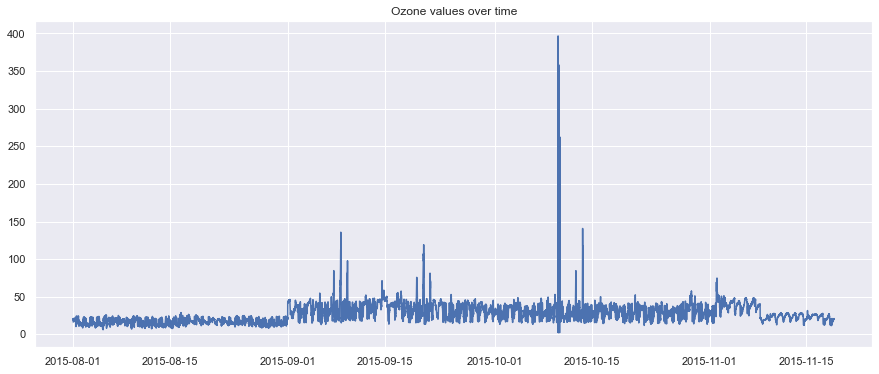

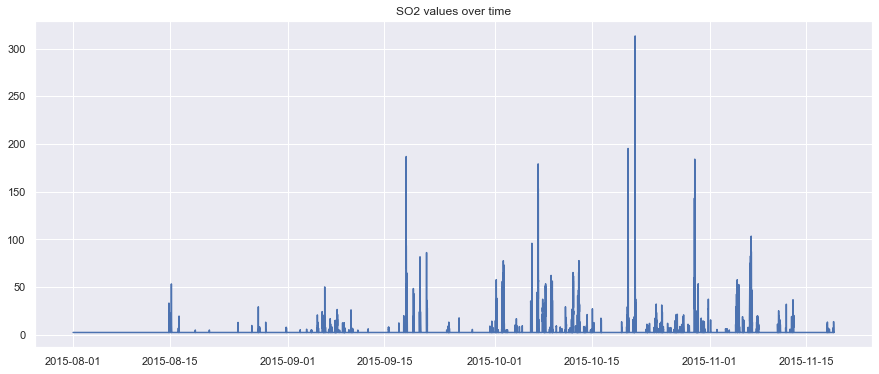

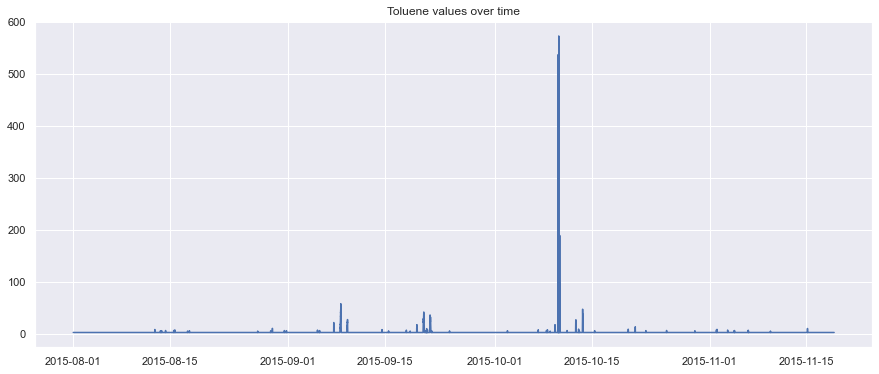

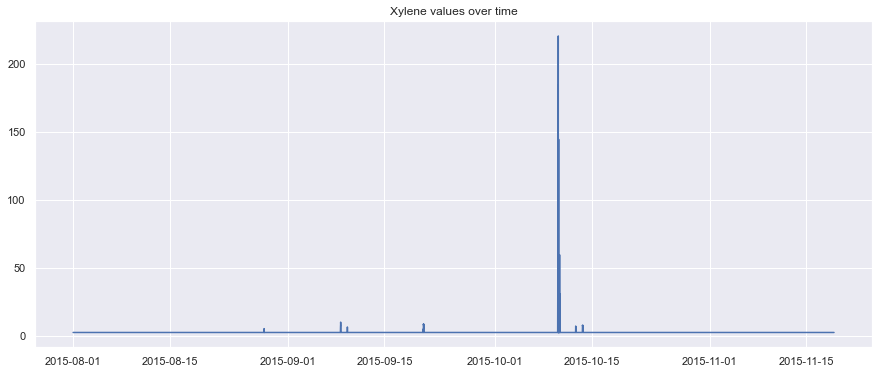

In [12]:
# pollutants plots
for val in df.columns[1:7]:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    plt.plot(df['Date'], df[val])
    plt.title(f'{val} values over time')

- No variance in CS2 levels
- Little variance in Benzene and Xylene levels
- Extreme pollution observed in mid-October 2015

In [13]:
df.drop('CS2', axis=1, inplace=True)

#### Outliers

In [14]:
for val in df.columns[1:6]:
    print(val.upper())
    print(f"max value: {df[val].max()} \ndate & time: {str(df['Date'][df[val] == df[val].max()].iloc[0])}\n")

BENZENE
max value: 9.95 
date & time: 2015-10-10 02:20:00

OZONE
max value: 396.67 
date & time: 2015-10-10 02:10:00

SO2
max value: 313.31 
date & time: 2015-10-21 06:00:00

TOLUENE
max value: 573.36 
date & time: 2015-10-10 04:30:00

XYLENE
max value: 220.61 
date & time: 2015-10-10 03:15:00



- Extreme values for most pollutants observed on 10/10/2015 between 2.10am and 3.15am

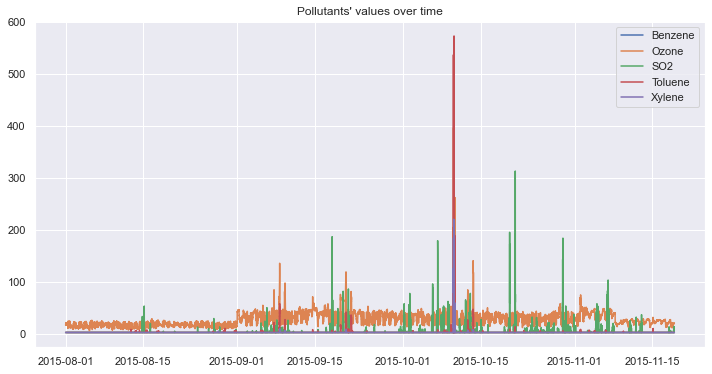

In [15]:
# pollutants plots
for val in df.columns[1:6]:
    plt.plot(df['Date'], df[val], label = val)
plt.title("Pollutants' values over time")
plt.legend();

In [16]:
#10/10/2015 values
df_october = df[(df.Date>='2015-10-10 00:00:00') & (df.Date<'2015-10-11 00:00:00')]

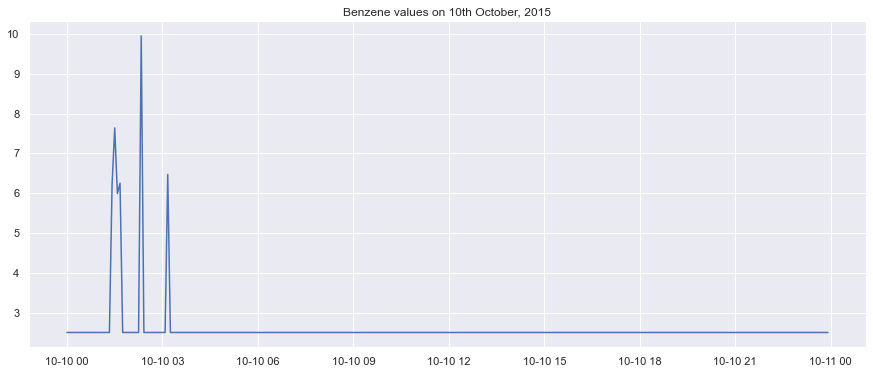

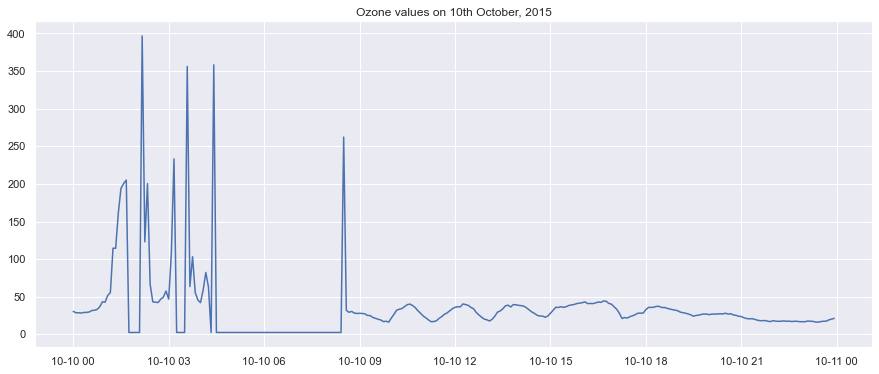

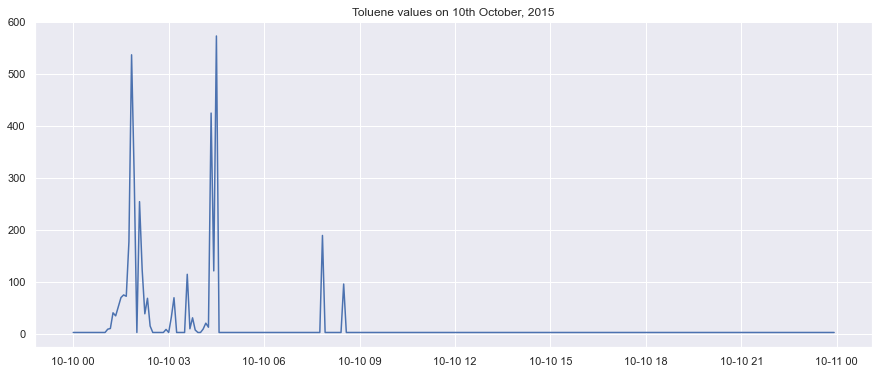

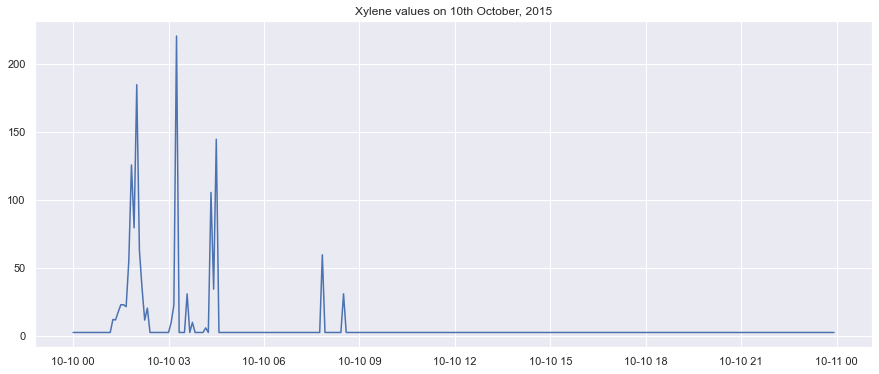

In [17]:
for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene']:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    plt.plot(df_october['Date'], df_october[val])
    plt.title(f'{val} values on 10th October, 2015')

- Peak in pollutants' levels between 1am and 9am

In [18]:
#21/10/2015 values
df_october = df[(df.Date>='2015-10-21 00:00:00') & (df.Date<'2015-10-22 00:00:00')]

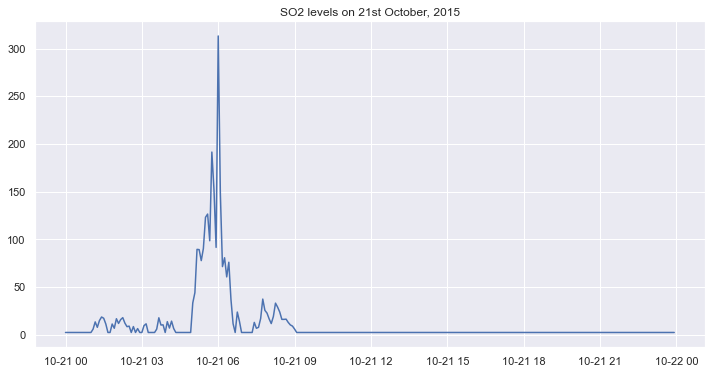

In [19]:
plt.plot(df_october['Date'], df_october['SO2'])
plt.title('SO2 levels on 21st October, 2015');

- Peak in SO2 levels between 4am and 7am

In [20]:
df_no_outliers = df[((df.Date<'2015-10-10 01:00:00') | (df.Date>='2015-10-11 09:00:00')) & 
                   ((df.Date<'2015-10-21 04:00:00') | (df.Date>='2015-10-22 07:00:00'))]

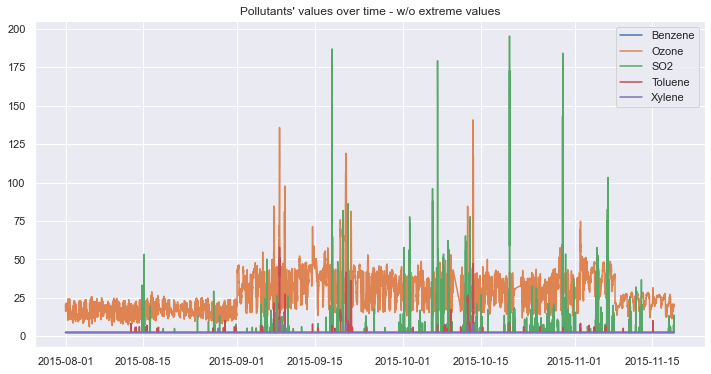

In [21]:
for val in df_no_outliers.columns[1:6]:
    plt.plot(df_no_outliers['Date'], df_no_outliers[val], label = val)
plt.title("Pollutants' values over time - w/o extreme values")
plt.legend();

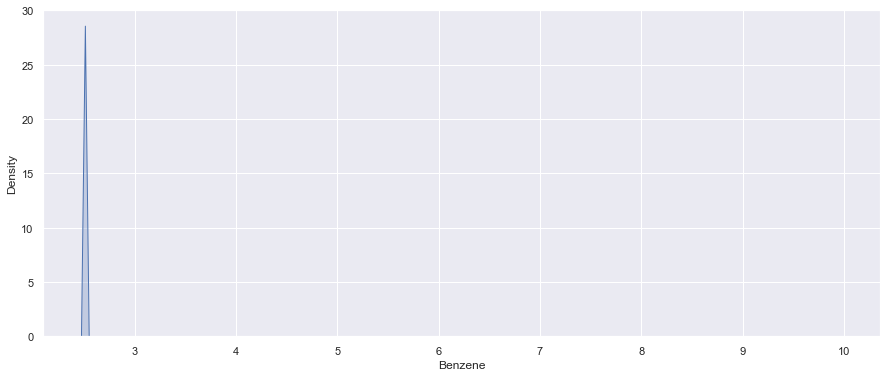

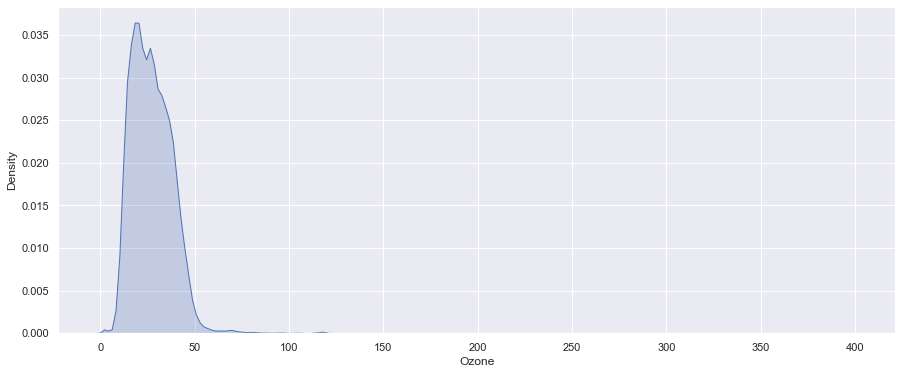

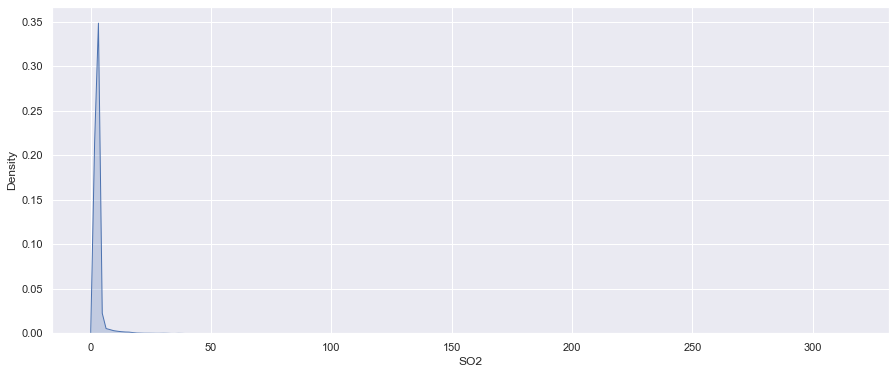

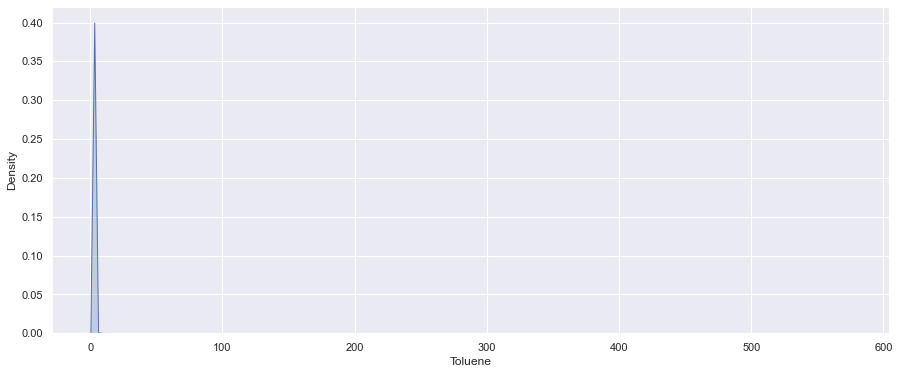

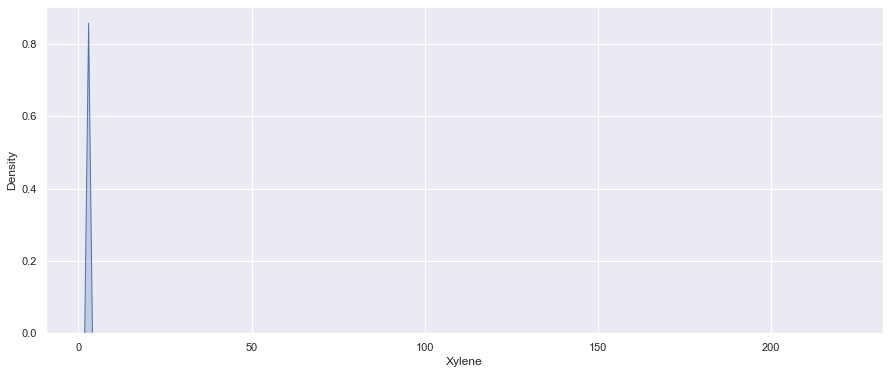

In [109]:
#skeweness
for val in df.columns[1:6]:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    fig = sns.kdeplot(df[val], shade=True)

- SO2 and Ozone distributions are positevely skewed
- Xylene, Toluene, Benzene, SO2 values are highly concentrated around one value

#### Correlation

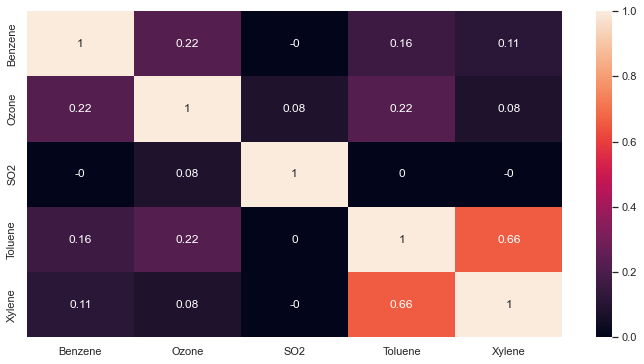

In [22]:
sns.heatmap(data=df[['Benzene', 'Ozone', 'SO2', 'Toluene', 'Xylene']].corr().round(2), annot=True);

- Highest correlation between Toluene and Xylene

**Autocorrelation**

Before calculating autocorrelation, the time series must be stationary.

In [23]:
stationary_df = df.set_index('Date')[['Benzene', 'Ozone', 'Toluene', 'Xylene']].diff(periods=1)

In [24]:
stationary_df.dropna(inplace=True)
stationary_df.head()

,Benzene,Ozone,Toluene,Xylene
Date,,,,
2015-08-01 00:05:00,0.0,2.65,0.0,0.0
2015-08-01 00:10:00,0.0,1.69,0.0,0.0
2015-08-01 00:15:00,0.0,-0.56,0.0,0.0
2015-08-01 00:20:00,0.0,0.09,0.0,0.0
2015-08-01 00:25:00,0.0,-1.94,0.0,0.0


In [25]:
df[['Date','Benzene', 'Ozone', 'Toluene', 'Xylene']].head()

,Date,Benzene,Ozone,Toluene,Xylene
0,2015-08-01 00:00:00,2.5,16.35,2.5,2.5
1,2015-08-01 00:05:00,2.5,19.00,2.5,2.5
2,2015-08-01 00:10:00,2.5,20.69,2.5,2.5
3,2015-08-01 00:15:00,2.5,20.13,2.5,2.5
4,2015-08-01 00:20:00,2.5,20.22,2.5,2.5


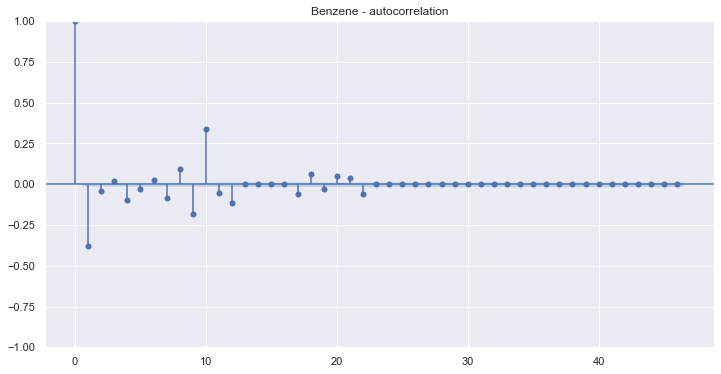

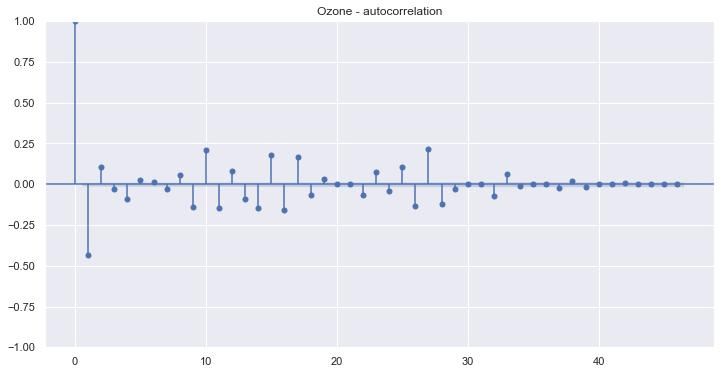

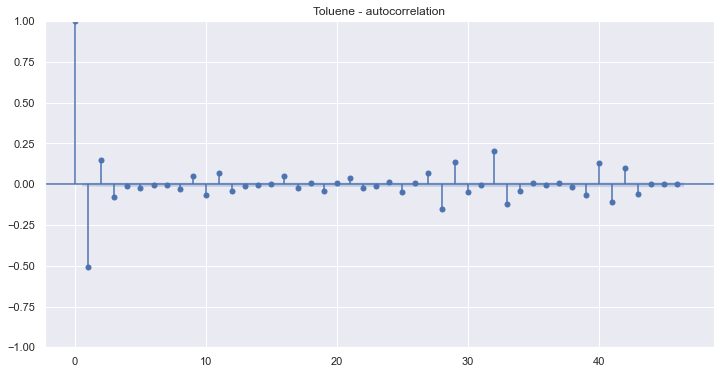

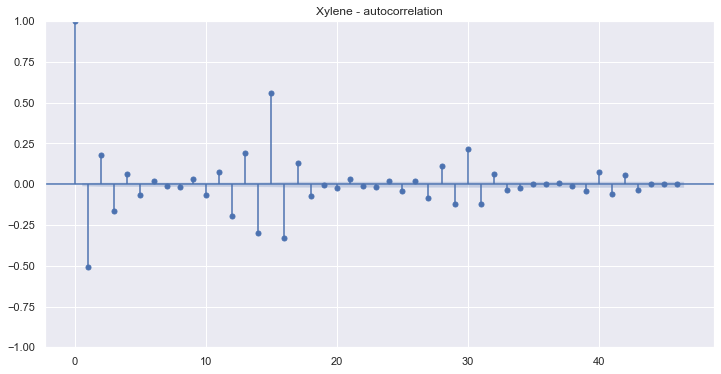

In [26]:
#autocorrelation
for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene']:
    plot_acf(stationary_df[[val]])
    plt.title(f'{val} - autocorrelation')

- No significant autocorrelatation for pollutants
- The highest autocorrelation appears to be for Xylene (lag=15), but it's still only around 0.6

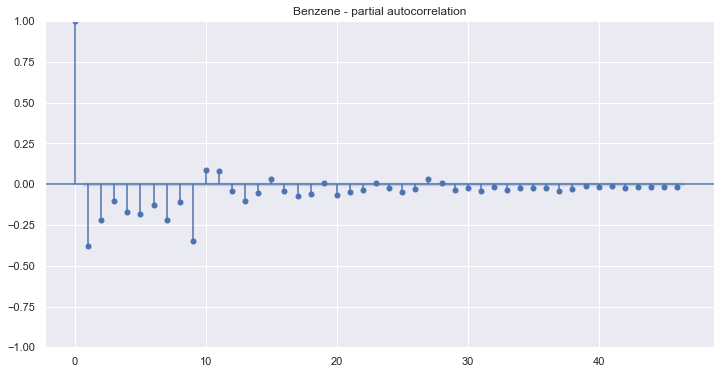

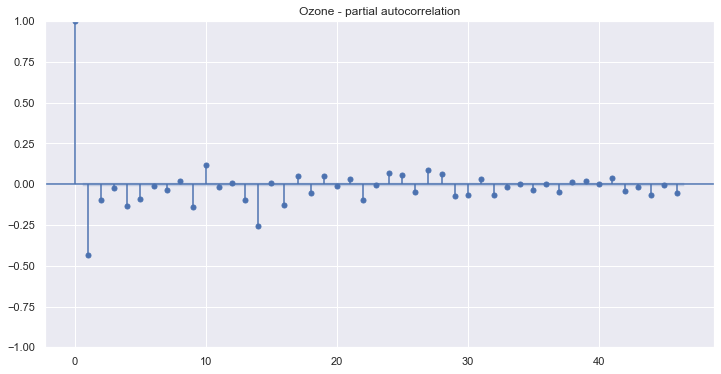

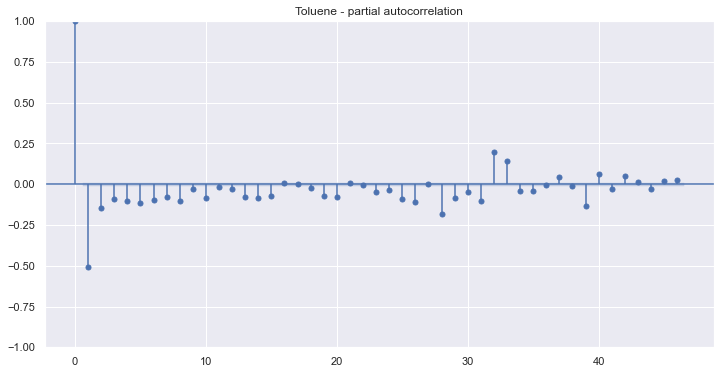

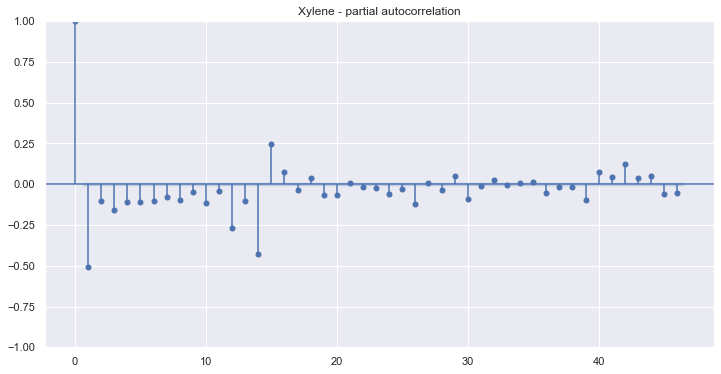

In [27]:
#partial autocorrelation
for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene']:
    plot_pacf(stationary_df[[val]], method='ywm')
    plt.title(f'{val} - partial autocorrelation')

- No significant partial autocorrelation for any pollutant

No significant lags suggests that forecasting pollutants using traditional statistical models, such as AR, MA and ARIMA will not be possible

In [28]:
#cross-correlation
ccf(df['Toluene'], df['Xylene'], adjusted=False)

array([6.56902794e-01, 3.98171875e-01, 3.52479986e-01, ...,
       1.21888438e-07, 8.12589584e-08, 4.06294792e-08])

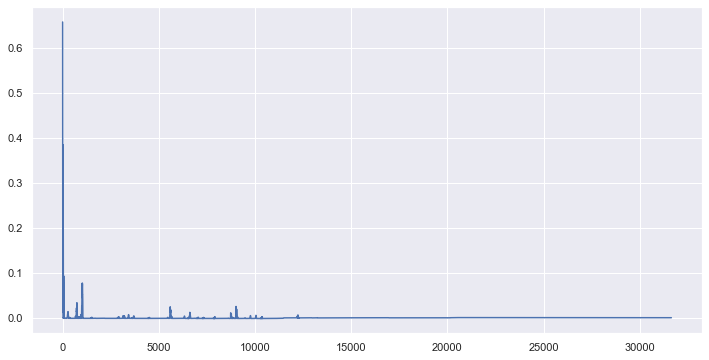

In [33]:
plt.plot(ccf(df['Toluene'], df['Xylene'], adjusted=False))

- No large cross correlation between the two correlated pollutants

## Wind analysis

In [38]:
df.head()

,Date,Benzene,Ozone,SO2,Toluene,Xylene,Wind Direction,Wind Speed,Wind Origin
0,2015-08-01 00:00:00,2.5,16.35,2.5,2.5,2.5,206.0,8.0,SSW
1,2015-08-01 00:05:00,2.5,19.00,2.5,2.5,2.5,206.0,8.0,SSW
2,2015-08-01 00:10:00,2.5,20.69,2.5,2.5,2.5,214.0,8.0,SSW
3,2015-08-01 00:15:00,2.5,20.13,2.5,2.5,2.5,219.0,9.0,SW
4,2015-08-01 00:20:00,2.5,20.22,2.5,2.5,2.5,219.0,11.0,SW


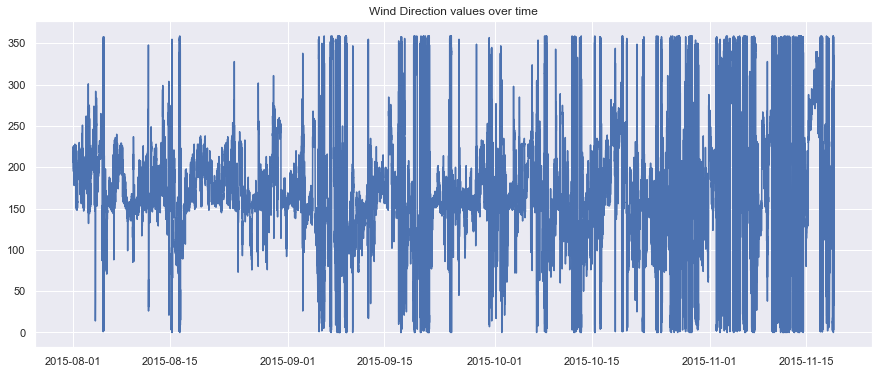

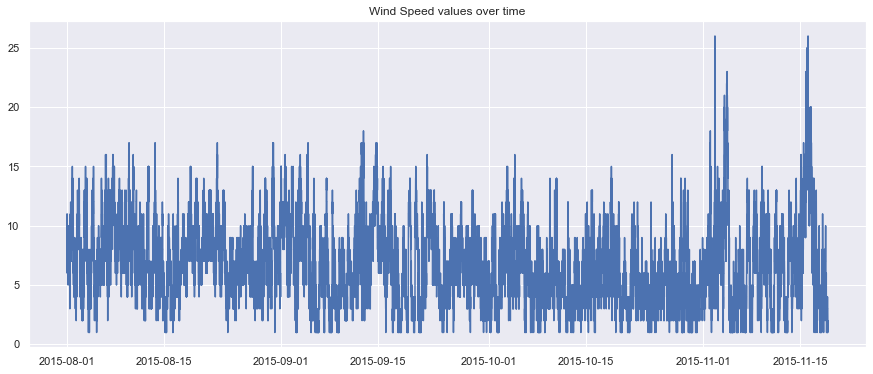

In [37]:
#wind plots
for val in df.columns[6:8]:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    plt.plot(df['Date'], df[val], label = val)
    plt.title(f'{val} values over time')

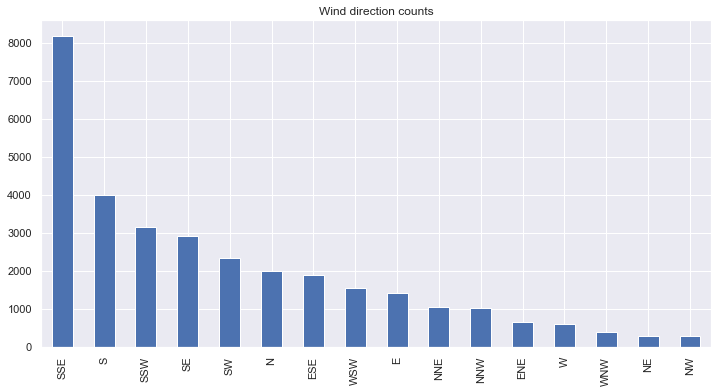

In [50]:
df['Wind Origin'].value_counts().plot(kind='bar', title='Wind direction counts');

## Dependencies between pollutants and wind


In [39]:
df.head()

,Date,Benzene,Ozone,SO2,Toluene,Xylene,Wind Direction,Wind Speed,Wind Origin
0,2015-08-01 00:00:00,2.5,16.35,2.5,2.5,2.5,206.0,8.0,SSW
1,2015-08-01 00:05:00,2.5,19.00,2.5,2.5,2.5,206.0,8.0,SSW
2,2015-08-01 00:10:00,2.5,20.69,2.5,2.5,2.5,214.0,8.0,SSW
3,2015-08-01 00:15:00,2.5,20.13,2.5,2.5,2.5,219.0,9.0,SW
4,2015-08-01 00:20:00,2.5,20.22,2.5,2.5,2.5,219.0,11.0,SW


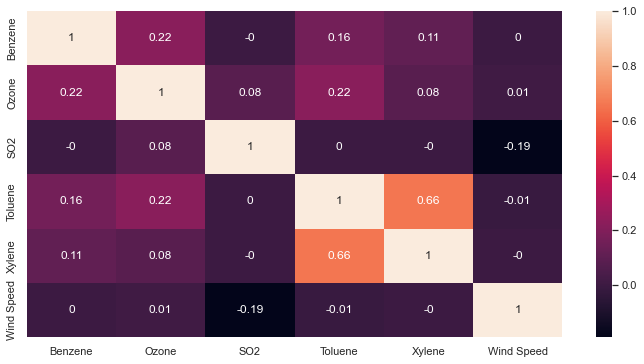

In [40]:
sns.heatmap(data=df[['Benzene', 'Ozone', 'SO2', 'Toluene', 'Xylene', 'Wind Speed']].corr().round(2), annot=True);

In [71]:
# for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene', 'SO2']:
#     fig, ax = plt.subplots(1,1, figsize=(20, 7))
#     fig.subplots_adjust(right=0.75)
#     twin = ax.twinx()
    
#     p1, = ax.plot(df['Date'], df[val],  label = val, color = 'g')
#     p2, = twin.plot(df['Date'], df['Wind Speed'], label = 'wind speed', color = 'r')

#     ax.set_xlabel("Date")
#     ax.set_ylabel(f"{val} values")
#     twin.set_ylabel("wind speed")
#     ax.legend(handles=[p1, p2], loc = "upper left")

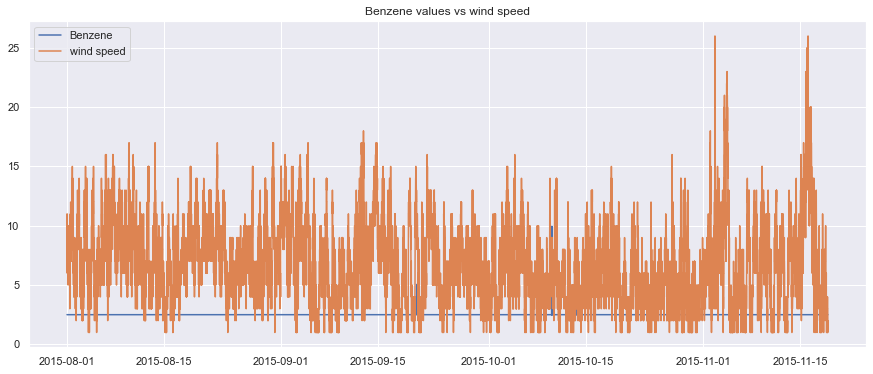

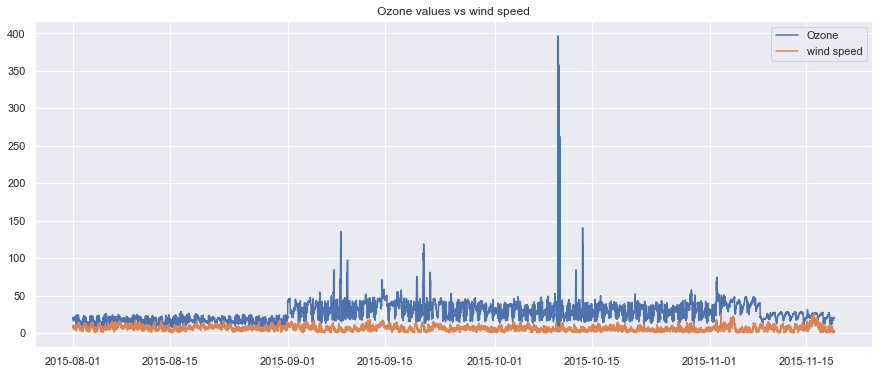

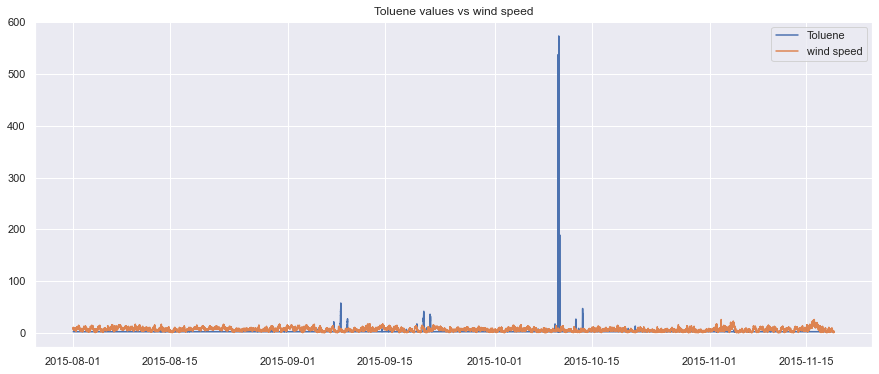

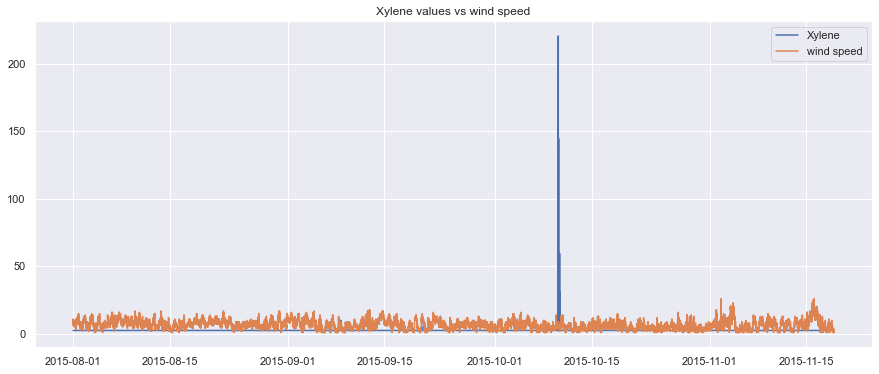

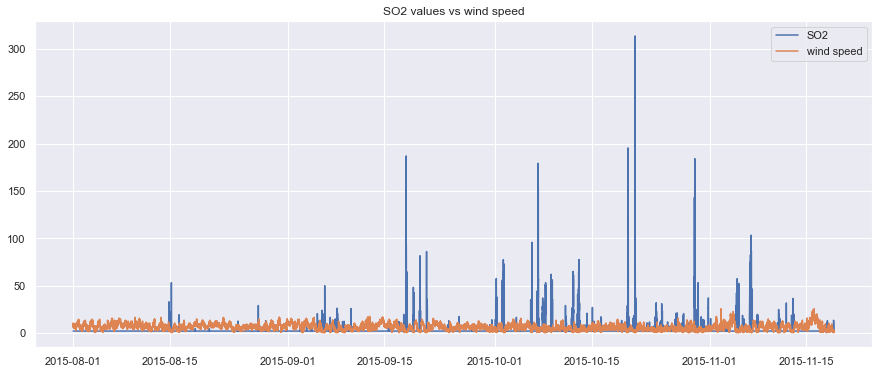

In [51]:
for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene', 'SO2']:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    plt.plot(df['Date'], df[val],  label = val)
    plt.plot(df['Date'], df['Wind Speed'], label = 'wind speed')
    plt.title(f'{val} values vs wind speed')
    plt.legend()

In [88]:
df.groupby('Wind Origin')['Toluene'].mean()

Wind Origin
E      2.588107
ENE    2.560358
ESE    2.673796
N      3.122951
NE     2.526268
NNE    2.512331
NNW    3.125971
NW     3.076559
S      2.901237
SE     2.599669
SSE    2.994434
SSW    2.882333
SW     2.666735
W      2.533522
WNW    2.541830
WSW    2.514284
Name: Toluene, dtype: float64

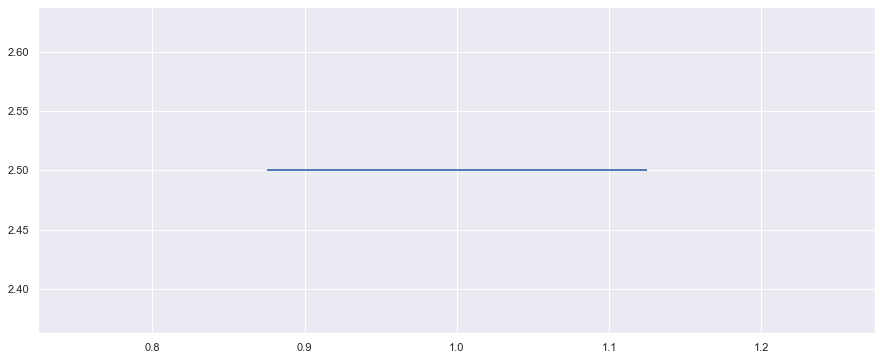

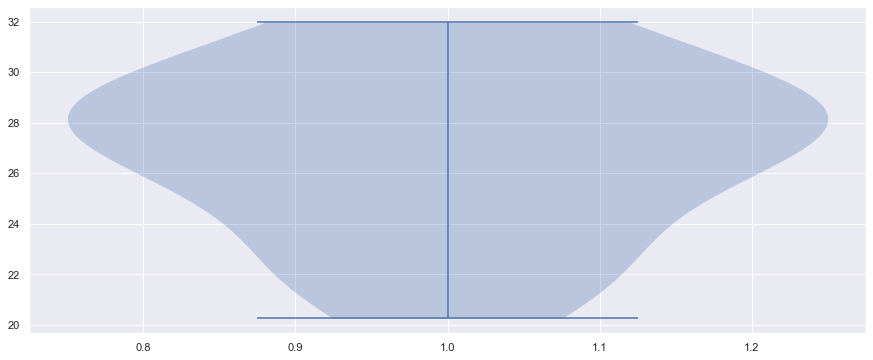

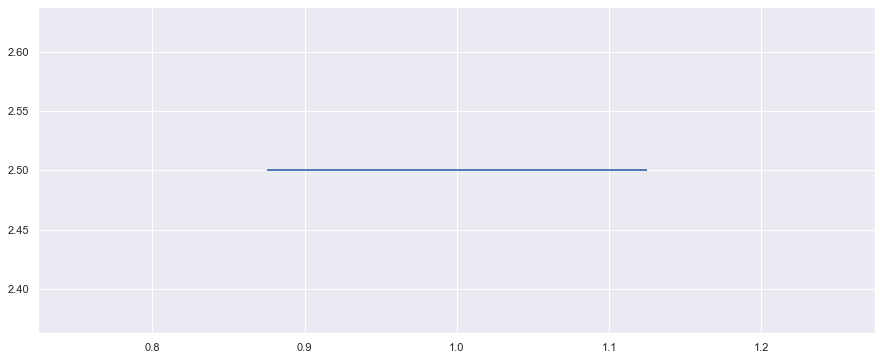

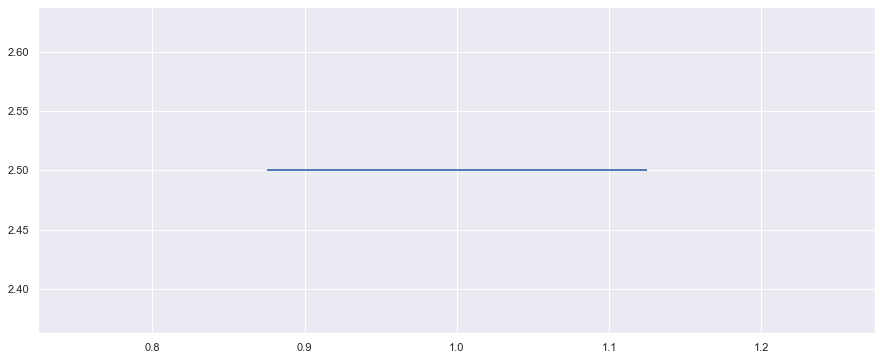

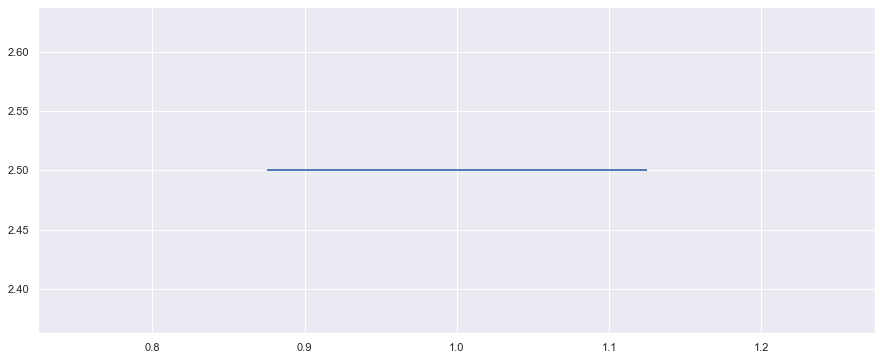

In [84]:
#violinplots with wind direction
for val in ['Benzene', 'Ozone', 'Toluene', 'Xylene', 'SO2']:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    plt.violinplot(df.groupby('Wind Origin')[val].median());

## Weather analysis
External data

In [76]:
#Atchison Village coordinates
location = Point(37.933611, -122.371667)

In [77]:
weather_df = Hourly(location, df.Date.min(), df.Date.max())
weather_df = weather_df.fetch()

In [78]:
weather_df.head(10)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2015-08-01 00:00:00,21.1,15.0,68.0,0.0,NaN,280.0,27.7,NaN,1015.3,NaN,NaN
2015-08-01 01:00:00,20.0,14.4,70.0,0.0,NaN,280.0,27.7,NaN,1014.9,NaN,NaN
2015-08-01 02:00:00,18.9,14.4,75.0,0.0,NaN,270.0,25.9,NaN,1014.9,NaN,NaN
2015-08-01 03:00:00,18.9,14.4,75.0,0.0,NaN,270.0,27.7,NaN,1015.5,NaN,NaN
2015-08-01 04:00:00,18.3,14.4,78.0,0.0,NaN,270.0,24.1,NaN,1015.7,NaN,NaN
2015-08-01 05:00:00,18.3,14.4,78.0,0.0,NaN,270.0,18.4,NaN,1015.8,NaN,NaN
2015-08-01 06:00:00,19.4,14.0,71.0,0.0,NaN,250.0,14.8,NaN,1015.7,NaN,NaN
2015-08-01 07:00:00,18.3,14.0,76.0,0.0,NaN,250.0,14.8,NaN,1015.7,NaN,NaN
2015-08-01 08:00:00,17.8,13.3,75.0,0.0,NaN,270.0,14.8,NaN,1015.4,NaN,NaN


In [79]:
weather_df.tail()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2015-11-18 20:00:00,16.1,10.0,67.0,0.0,NaN,200.0,7.6,NaN,1023.1,NaN,NaN
2015-11-18 21:00:00,16.1,10.6,70.0,0.0,NaN,220.0,11.2,NaN,1022.3,NaN,NaN
2015-11-18 22:00:00,17.2,11.7,70.0,0.0,NaN,250.0,7.6,NaN,1021.2,NaN,NaN
2015-11-18 23:00:00,17.8,12.3,70.0,0.0,NaN,260.0,16.6,NaN,1020.6,NaN,NaN
2015-11-19 00:00:00,17.2,12.1,72.0,0.0,NaN,260.0,11.2,NaN,1020.7,NaN,NaN


In [80]:
weather_df.to_csv('weather_data_atchison_village.csv')

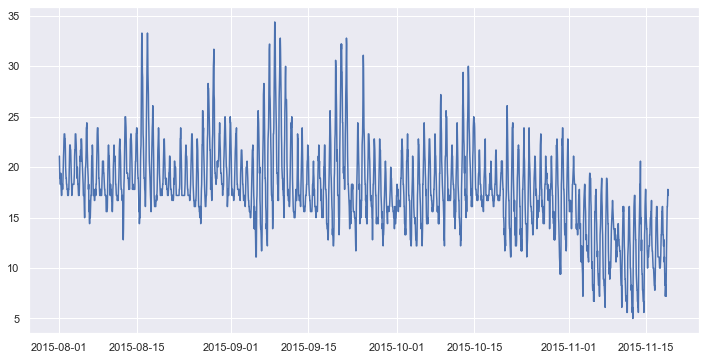

In [81]:
sns.set(rc={'figure.figsize':(12,6)})
plt.plot(weather_df.index, weather_df.temp)